#Monitoria 03: Algoritmos de Busca Local

Autores: Hugo Amorim - 2020.3 (haan2@ecomp.poli.br), Ana Catarina Fonseca - 2020.1

Duvidas: acgfp@ecomp.poli.br

Este trabalho foi criado para a disciplina de Inteligencia Artificial do curso de Engenharia da Computação da UPE, ministrada pelo Prof. Fernando Buarque. 

**Referências Bibliográficas**:

RUSSELL, Stuart; NORVIG, Peter. Artificial intelligence: a modern approach. 1995.



#Algoritmos

1. Hill-Climbing
2. Tabu Search
3. Simulated Annealing
4. Iterated Local Search
5. Local Beam


**Hill-Climbing**

```
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

while fitness(solucao_incial) != fitness_ideal:
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)
  # PODE SER MAIOR QUE OU MENOR QUE, DEPENDE DO PROBLEMA
  if fitness(nova_solucao) > fitness(solucao_inicial): 
    solucao_incial = nova_solucao
```

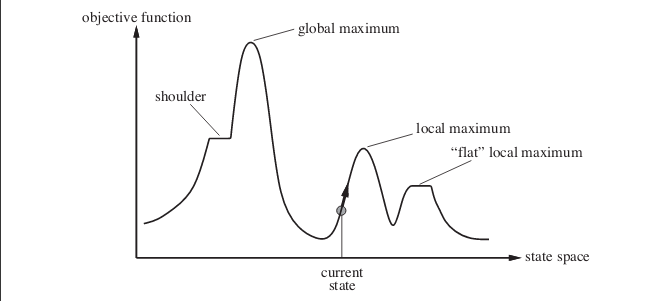

[Imagem 1 - Hill Climbing](https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/)


O pseudo-codigo acima parte do principio que se sabe o fitness ideal, caso não se saiba pode-se mudar a condicao de parada. Outros exemplos de condições de parada podem ser um determinada quantidade de tempo, um numero de iterações, um determinado fitness, um numero de iteracoes sem melhora etc.

Mostraremos como resolver o caixeiro viajante com o hill climbing.

**[Tabu Search](https://www.ime.usp.br/~gold/cursos/2009/mac5758/AndreBuscaTabu.pdf)**

No Tabu Search o algoritmo salva as K ultimas soluções visitadas e as evita, dessa forma reduzindo a chance de ficar preso em platôs

```
TAMANHO_DA_MEMORIA = 10 # PARAMETRO
ITERACOES = 2000 # PARAMETRO
memoria = []
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

for i in range(0, ITERACOES ):
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)

  solucao_ja_testada = true
  while solucao_ja_testada:
    solucao_ja_testada = verificar_se_solucao_na_memoria()
    if solucao_ja_testada:
      nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)

  if len(memoria) == TAMANHO_DA_MEMORIA:
    memoria.pop(0) # remove o primeiro elemento da lista
  memoria.append(nova_solucao) #adiciona um elemento no final da lista

  # AQUI COLOCAMOS O IGUAL SEM PROCUPAÇÃO POIS O ALGORITMO TEM O MECANISMO QUE  EVITA PLATÔS
  if fitness(nova_solucao) >= fitness(solucao_inicial): 
    solucao_incial = nova_solucao
```


[**Simulated Annealing**](https://sites.icmc.usp.br/sandra/G9_t2/annealing.htm)


[Têmpera simulada (Simulated Annealing)](https://www.youtube.com/watch?v=VuJEH-QQ1CM&ab_channel=IAExpertAcademy)
```
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

Temperatura_maxima = parametro_1
Temperatura_minima = parametro_2
Temperatura_atual = Temperatura_maxima

while Temperatura_atual > Temperatura_minima:
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)
  if fitness(nova_solucao) < fitness(solucao_inicial): #minimização
    solucao_incial = nova_solucao

  elif exp((fitness(solucao_inicial) - fitness(nova_solucao))/Temperatura_atual) > random(0,1): 
  # caso seja um problema de maximização a ordem do fitness inverte
    solucao_incial = nova_solucao
  temperatura_atual = atualizar_temperatura()
```

No Simulated Annealing existe o conceito de temperatura que possibilita em alguns casos o algoritmo ir para um local com um fitness pior, isso é feito para incentivar exploração e evitar pontos de otimo local


**Exploration vs Exploitation**

Exploração = Exploration (em largura): maior cobertura do espaço de busca

Exploração = Exploitation (em profundidade): busca em profundidade em uma região do espaço de busca


**Iterated Local Search**

```
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()
 
while fitness(solucao_incial) != fitness_ideal:

  #faz uma perturbação E faz a mudança
  nova_solucao = perturbacao(solucao_inicial) 

  nova_solucao = realizar_mudanca_na_solucao(nova_solucao)
  if fitness(nova_solucao) > fitness(solucao_inicial): # PODE SER MAIOR QUE OU MENOR QUE, DEPENDE DO PROBLEMA
    solucao_incial = nova_solucao
```

No Iterated Local Search é realizado uma perturbação na solução para incentivar exploração



**Local Beam**

Já no Local Beam a logica segue a do Hill-Climbing, mas ao invés de ter um indivíduo o algoritmo mantem uma quantidade K de indivíduos.

```
solucoes_atuais = [] 
K = parametro_1

for i in range(0, K):
  solucoes_atuais.append(valor_aleatorio_dentro_do_espaco_de_busca())

while criterio de parada:
  novas_solucoes = realizar_mudanca_nas_solucoes(solucoes_atuais) 
  todas_as_solucoes = novas_solucoes.append(solucoes_atuais)
  todas_as_solucoes = remover_piores_solucoes(todas_as_solucoes) 
```

#Problemas

1. N Rainhas
2. [Caixeiro Viajante](https://github.com/anacgfp/monitoria-IA/tree/main/Monitoria%2002)

In [1]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# Codigo para o problema do caixeiro viajante
CIDADES = pd.read_csv('/content/cidades.csv')
NUM_CIDADES = CIDADES.count()[0]


class cidade:
  def __init__(self, x, y):
    self.posicao_x = x
    self.posicao_y = y
  def distancia(self, cidade_externa):
    return  math.sqrt((self.posicao_x - cidade_externa.posicao_x)**2 + 
                      (self.posicao_y - cidade_externa.posicao_y)**2)

In [4]:
# Cria uma lista de instancias de cidade a partir de um dataframe

def instanciar_cidades(_cidades):
  lista = [] #Lista de Instâncias
  for i in range(0, NUM_CIDADES):
    cidade_aux = cidade(_cidades[' x'][i], _cidades[' y'][i])
    lista.append(cidade_aux)
  return lista

def gerar_solucao_aleatoria(lista_cidades):
  lista_de_cidades = list(range(0, NUM_CIDADES))
  lista_aleatoria = []
  for i in range(0, NUM_CIDADES):
    cidade = random.choice(lista_de_cidades) #index
    lista_aleatoria.append(lista_cidades[cidade])
    lista_de_cidades.remove(cidade)
  return lista_aleatoria

def fitness(possivel_solucao):
  fitness = 0
  for i in range(0, NUM_CIDADES): 
    if i < NUM_CIDADES - 1:
      fitness += possivel_solucao[i].distancia(possivel_solucao[i+1])
    else:
      fitness += possivel_solucao[i].distancia(possivel_solucao[0]) #último pro primeiro
  return fitness

#Seleciona duas cidades aleatórias e troca elas de posição
def mudar_solucao(solucao):
  solucao_modificada = []
  for i in range(0, NUM_CIDADES):
    solucao_modificada.append(solucao[i])
  index_1 = random.randint(0, NUM_CIDADES - 1)
  index_2 = random.randint(0, NUM_CIDADES - 1)
  while(index_1 == index_2):
    index_2 = random.randint(0, NUM_CIDADES - 1)
  cidade_1, cidade_2 = solucao[index_1], solucao[index_2]
  solucao_modificada[index_2], solucao_modificada[index_1] = cidade_1, cidade_2
  return solucao_modificada

# --- Codigo para demonstração visual utilizando matplotlib ---

# Caixeiro Viajante
def gerar_grafico(solucao, titulo="Rota do Caixeiro Viajante"):
  x = []
  y = []
  for i in range(0, NUM_CIDADES):
    x.append(solucao[i].posicao_x)
    y.append(solucao[i].posicao_y)
    plt.plot(solucao[i].posicao_x, 
             solucao[i].posicao_y, 'ro')
  #ro = red cicle markers

  x.append(solucao[0].posicao_x)
  y.append(solucao[0].posicao_y)
  plt.plot(x, y)
  plt.title(titulo)
  plt.show()
# --- Fim do codigo para demonstração visual utilizando matplotlib ---

lista_cidades = instanciar_cidades(CIDADES)

**N Rainhas**

Dado um tabuleiro NxN Coloque nele N rainhas de maneira que nenhuma rainha possa atacar outra (Ou seja não é Permitido colocar uma rainha na mesma linha, coluna ou diagonal que outra)

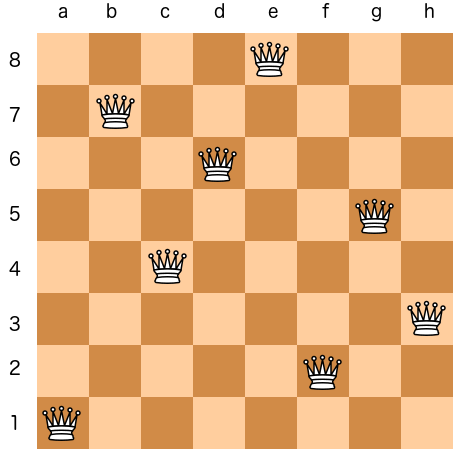

In [3]:
# Codigo para o problema das N rainhas

NUMERO_DE_RAINHAS = 25

# No python quando se faz lista_A = lista_B as listas ficam ligadas e caso se 
# mude uma tambem se muda a outra, usar o copy é uma maneira de evitar isso
import copy

class rainha:
  def __init__(self, posicao_x):
    self.x = posicao_x

def gerar_solucao_aleatoria_n_rainhas():
  lista_aleatoria = []
  for i in range(0, NUMERO_DE_RAINHAS):
    lista_aleatoria.append(rainha(random.randint(0, NUMERO_DE_RAINHAS - 1)))
  return lista_aleatoria

def fitness_n_rainhas(possivel_solucao):
  fitness = 0
  for i in range(0, NUMERO_DE_RAINHAS-1): 
    for j in range(i+1, NUMERO_DE_RAINHAS): #Do "i" em diante
      if possivel_solucao[i].x == possivel_solucao[j].x: #Mesma Linha
        fitness += 1 #penalização
      if ((possivel_solucao[i].x + j - i) == possivel_solucao[j].x) or ((possivel_solucao[i].x - j + i) == possivel_solucao[j].x): #Checa diagonal
        fitness += 1
  return fitness

def mudar_solucao_n_rainhas(solucao):
  solucao_modificada = copy.deepcopy(solucao)
  index = random.randint(0, NUMERO_DE_RAINHAS - 1) #rainha aleatória
  posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1) #nova posição x pra rainha
  while posicao_1 == solucao_modificada[index].x: #garante que a nova posição x seja diferente da anterior
    posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  solucao_modificada[index].x = posicao_1
  
  return solucao_modificada

# Problemas x Algoritmos: Aplicações

Fitness Inicial:  27944.196


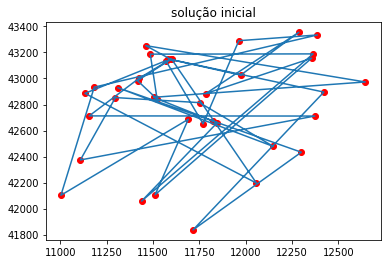

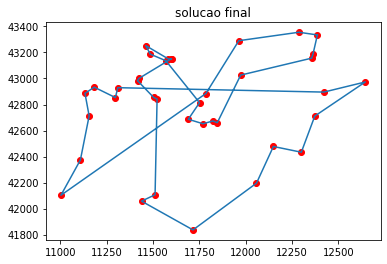

Melhor Fitness final:  9642.76859731333


In [5]:
# --- Algoritimo: Hill Climbing ---
# --- Problema: Caixeiro Viajante ---

# Parametros
MAX_NUMERO_DE_ITERACOES = 50000

cidades = instanciar_cidades(CIDADES)

def executar_hill_climbing():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria(cidades)

  # É calculado o fitness da solução incial
  melhor_fitness = fitness(solucao_atual)

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES

  print('Fitness Inicial: ', "%.3f" % melhor_fitness)

  # --- Função para demonstração visual utilizando matplotlib ---
  gerar_grafico(solucao_atual, 'solução inicial')

  # --- Inicio da execução do algoritmo ---

  # Criterio de parada 1
  # Seguro pois independe do que acontecer no algoritmo o codigo ira finalizar 
  # sua execução
  for i in range(0, numero_de_iteracoes):

  # Criterio de parada 2 
  # Pode causar problemas pois caso o valor de fitness desejado nao seja atingido
  # (caso o algoritmo fique preso num ponto de otimo local por exemplo) o 
  # algoritmo pode ficar rodando indeterminadamente
  # while True:
  # if melhor_fitness < 7000:
  #   break

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao(solucao_atual)

    # A nova solução é comparada com a anterior
    if fitness(nova_solucao) < fitness(solucao_atual):

      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUM_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      melhor_fitness = fitness(solucao_atual)

  # --- Função para demonstração visual utilizando matplotlib ---
  gerar_grafico(solucao_atual, 'solucao final')

  return melhor_fitness

  # --- Fim da execução do algoritimo ---


print('Melhor Fitness final: ', executar_hill_climbing())


In [9]:
# --- Algoritimo: Tabu Search ---
# --- Problema: N Rainhas ---

# Parametros
MAX_NUMERO_DE_ITERACOES_TABU = 4000
MEMORIA_MAXIMA = 10
memoria = []

def executar_tabu_search():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria_n_rainhas()

  # É calculado o fitness da solução incial
  melhor_fitness = fitness_n_rainhas(solucao_atual)

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES_TABU

  print('Fitness Inicial: ', melhor_fitness)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada
  for i in range(0, numero_de_iteracoes):

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao_n_rainhas(solucao_atual)

    solucao_ja_testada = True
    while solucao_ja_testada:
      for k in memoria:
        for z in range(0, NUMERO_DE_RAINHAS):
          if k[z].x == nova_solucao[z].x:
            solucao_ja_testada = True
            break
      else:
        solucao_ja_testada = False
      if solucao_ja_testada:
        nova_solucao = realizar_mudanca_na_solucao(solucao_atual)
 
    if len(memoria) == MEMORIA_MAXIMA:
      memoria.pop(0)
    memoria.append(copy.deepcopy(nova_solucao))

    # A nova solução é comparada com a anterior
    if fitness_n_rainhas(nova_solucao) <= fitness_n_rainhas(solucao_atual):
      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear() #evitar conflitos de memória
      for j in range(0, NUMERO_DE_RAINHAS):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      melhor_fitness = fitness_n_rainhas(solucao_atual)
  return melhor_fitness

  # --- Fim da execução do algoritimo ---
print("Fitness final: ", executar_tabu_search())

Fitness Inicial:  30
Fitness final:  1


Fitness Inicial:  27928.699


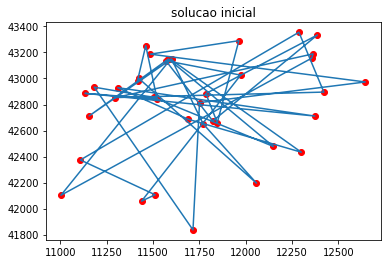

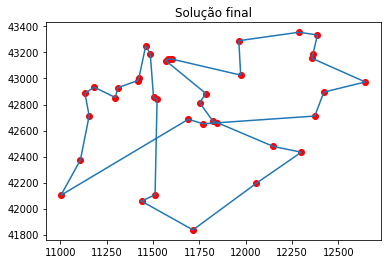

8702.52565824162

In [13]:
# --- Algoritmo: Simulated Annealing ---
# --- Problema: Caixeiro Viajante ---

# para calcular e^x, pois a biblioteca math estava dando erro
import numpy as np

# Parametros
TEMPERATURA_MAXIMA = 500.0
TEMPERATURA_MINIMA = 0.01

cidades = instanciar_cidades(CIDADES)

def executar_simulated_annealing():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria(cidades)

  # É calculado o fitness da solução incial
  fitness_atual = fitness(solucao_atual)

  # É definido um criterio de parada
  temperatura = TEMPERATURA_MAXIMA

  print('Fitness Inicial: ', "%.3f" % fitness_atual)

  # --- Função para demonstração visual utilizando matplotlib ---
  gerar_grafico(solucao_atual, 'solucao inicial')

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada 
  while temperatura > TEMPERATURA_MINIMA:

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao(solucao_atual)

    # A nova solução é comparada com a anterior
    if fitness(nova_solucao) < fitness(solucao_atual):

      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUM_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      fitness_atual = fitness(solucao_atual)
    
    # Mesmo que o novo local seja pior que o anterior existe uma chance que o 
    # algoritmo va a ele, isso é feito para aumentar a exploração e evitar 
    # otimos locais
    elif np.exp(((fitness(solucao_atual) - fitness(nova_solucao))/temperatura)) > random.random():
      solucao_atual.clear()
      for j in range(0, NUM_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # o fitness é atualizado
      fitness_atual = fitness(solucao_atual)
  
    temperatura -= TEMPERATURA_MINIMA

  # --- Função para demonstração visual utilizando matplotlib ---
  gerar_grafico(solucao_atual, "Solução final")

  return fitness_atual

  # --- Fim da execução do algoritimo ---
executar_simulated_annealing()

In [16]:
# --- Algoritimo: Iterated Local Search ---
# --- Problema: N Rainhas ---

# Parametros
MAX_NUMERO_DE_ITERACOES_ITERATED = 4000

def perturbar_solucao(solucao):
  solucao_modificada = copy.deepcopy(solucao)
  index = random.randint(0, NUMERO_DE_RAINHAS - 1)
  index_2 = random.randint(0, NUMERO_DE_RAINHAS - 1)

  posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  posicao_2 = random.randint(0, NUMERO_DE_RAINHAS - 1)

  while posicao_1 == solucao_modificada[index].x:
    posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  while posicao_2 == solucao_modificada[index_2].x:
    posicao_2 = random.randint(0, NUMERO_DE_RAINHAS - 1)

  solucao_modificada[index].x = posicao_1
  solucao_modificada[index_2].x = posicao_2
  
  return solucao_modificada

def executar_iterated_local_search():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria_n_rainhas()

  # É calculado o fitness da solução incial
  melhor_fitness = fitness_n_rainhas(solucao_atual)

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES_ITERATED

  print('Fitness Inicial: ', melhor_fitness)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada
  for i in range(0, numero_de_iteracoes):

    # A solução é Perturbada
    nova_solucao = perturbar_solucao(solucao_atual)

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao_n_rainhas(nova_solucao)

    # A nova solução é comparada com a anterior
    if fitness_n_rainhas(nova_solucao) < fitness_n_rainhas(solucao_atual):
      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_RAINHAS):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      fitness_atual = fitness_n_rainhas(solucao_atual)
      if fitness_atual < melhor_fitness:
        melhor_fitness = fitness_atual

  return melhor_fitness

  # --- Fim da execução do algoritimo ---
print("Fitness final: ", executar_iterated_local_search())

Fitness Inicial:  24
Fitness final:  5


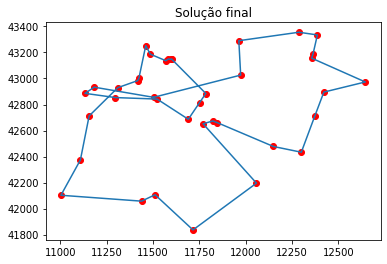

7988.61995803494

In [ ]:
# --- Algoritimo: Local Beam ---
# --- Problema: Caixeiro Viajante ---

# Parametros
MAX_NUMERO_DE_ITERACOES_LOCAL = 5000
NUMERO_INDIVIDUOS = 10

cidades = instanciar_cidades(CIDADES)


def calcular_fitness_e_organizar_os_melhores(lista_de_solucoes):
  melhores_solucoes = []
  fitness_atual = 0
  for i in range(0, len(lista_de_solucoes)):
    fitness_atual = fitness(lista_de_solucoes[i])
    for j in range(0, len(melhores_solucoes)):
      if fitness_atual < melhores_solucoes[j][0]:
        melhores_solucoes.insert(j, [fitness_atual, i])
        break
    else:
      melhores_solucoes.append([fitness_atual, i])

  return (melhores_solucoes)

def executar_local_beam():

  # É gerada uma lista de soluções iniciais aleatoria
  solucoes = []
  for i in range(0, NUMERO_INDIVIDUOS):
    solucoes.append(gerar_solucao_aleatoria(cidades))

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES_LOCAL

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada
  for i in range(0, numero_de_iteracoes):
    
    nova_solucao = []
    # Novas soluções são geradas
    for k in range(0, NUMERO_INDIVIDUOS):
      nova_solucao.append(mudar_solucao(solucoes[k]))
      nova_solucao.append(solucoes[k])

    # Calcula os fitness e retorna uma lista em ordem de melhor para pior
    all_fitness = calcular_fitness_e_organizar_os_melhores(nova_solucao)
    solucoes.clear()
    for k in range(0, NUMERO_INDIVIDUOS):
        solucoes.append(nova_solucao[all_fitness[k][1]])
  gerar_grafico(solucoes[0], "Solução final")
  return fitness(solucoes[0])

  # --- Fim da execução do algoritimo ---
executar_local_beam()

Fitness Inicial:  27121.431


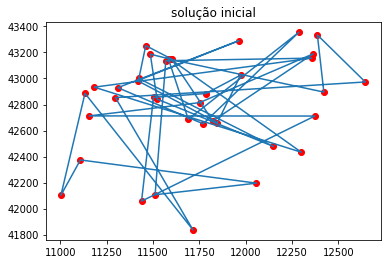

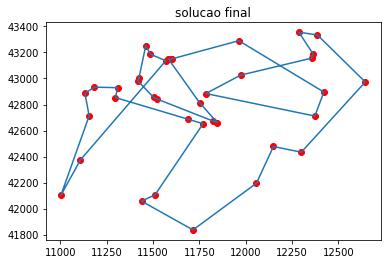

Fitness Inicial:  27180.559


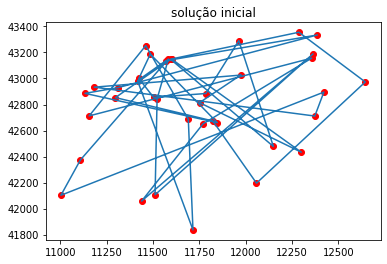

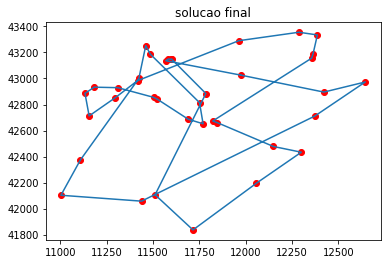

Fitness Inicial:  25474.231


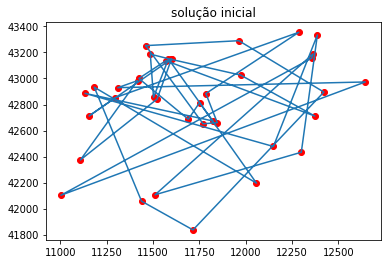

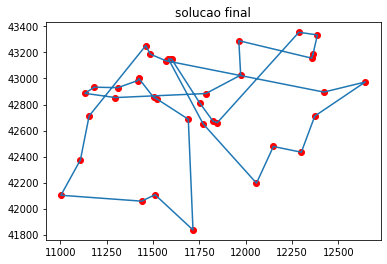

Fitness Inicial:  26760.027


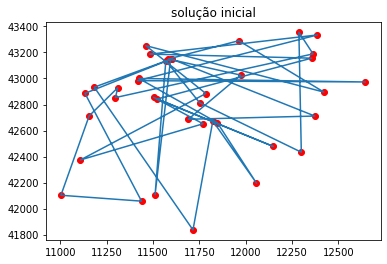

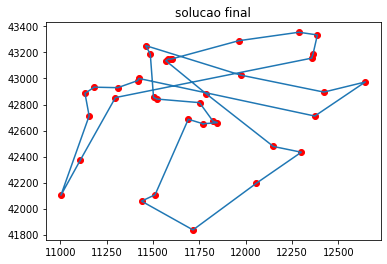

Fitness Inicial:  27540.312


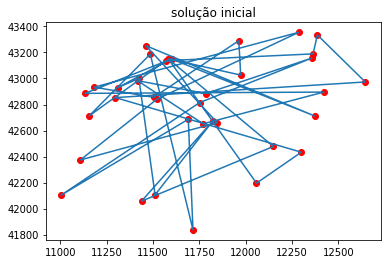

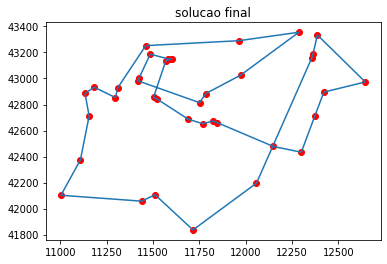

Fitness Inicial:  22701.827


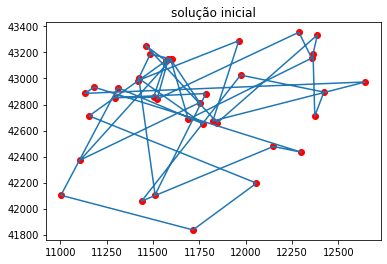

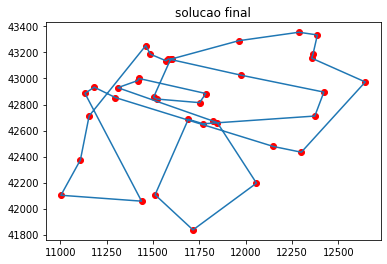

Fitness Inicial:  26308.336


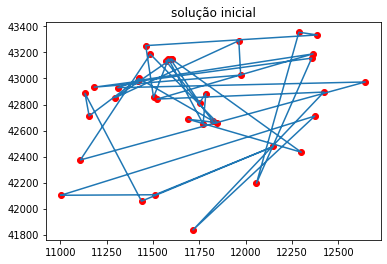

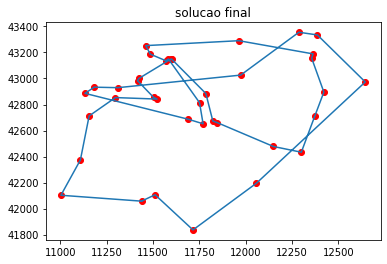

Fitness Inicial:  29893.066


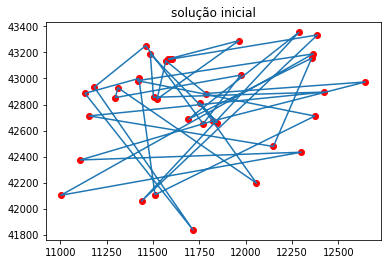

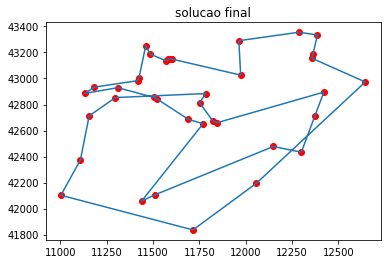

---------- Caixeiro viajante ------- Hill Climbing ----------------
Melhore resultado de todas as execuções:  8725.689
Resultado medio:  10280.459
-------------------------------------------------------------------


Fitness Inicial:  27089.391


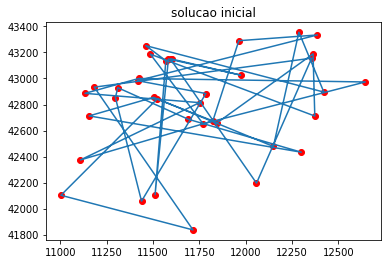

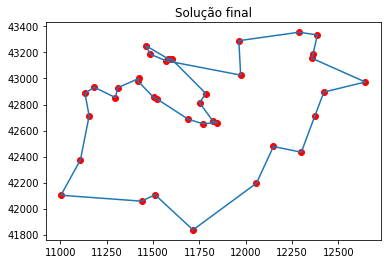

Fitness Inicial:  26309.560


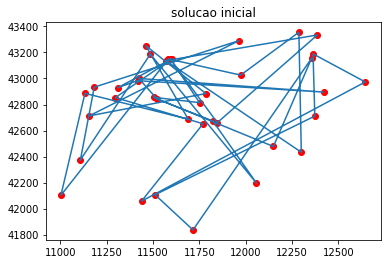

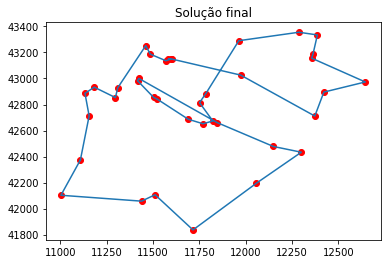

Fitness Inicial:  28088.314


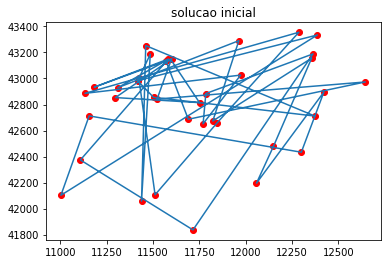

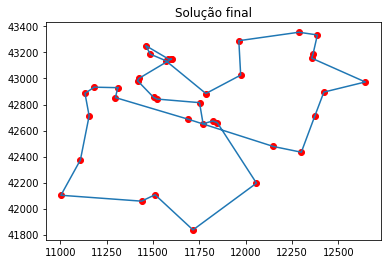

Fitness Inicial:  28792.236


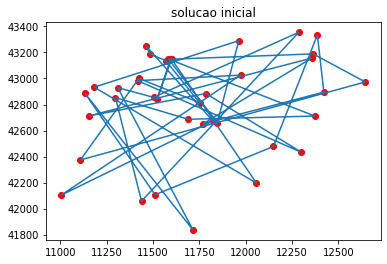

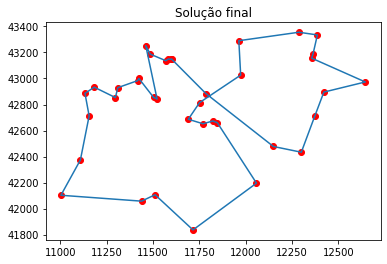

Fitness Inicial:  28942.192


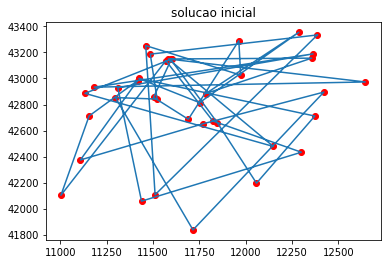

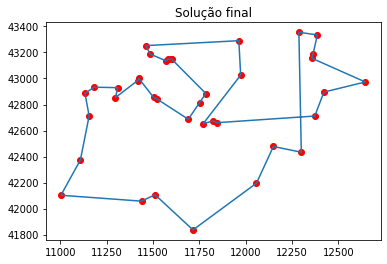

Fitness Inicial:  27609.458


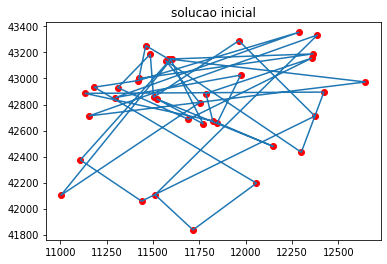

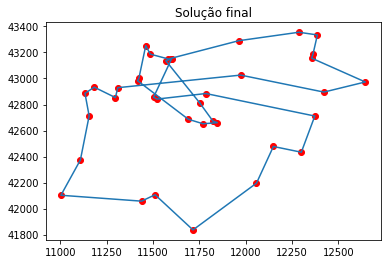

Fitness Inicial:  26224.187


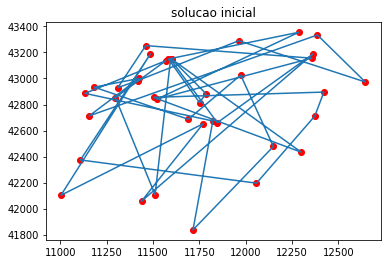

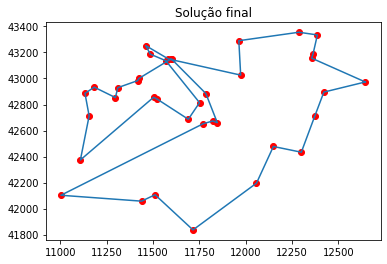

Fitness Inicial:  29169.759


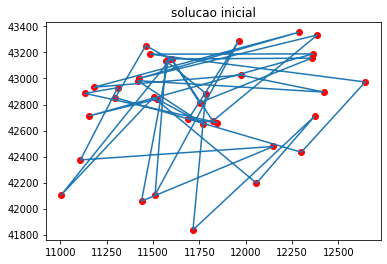

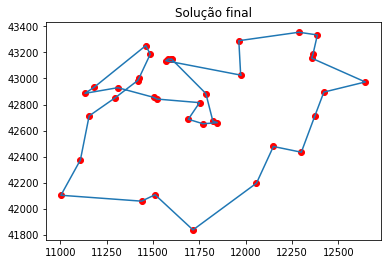

---------- Caixeiro viajante ------- Simulated Annealing ----------
Melhore resultado de todas as execuções:  6915.220
Resultado medio:  7883.538
-------------------------------------------------------------------




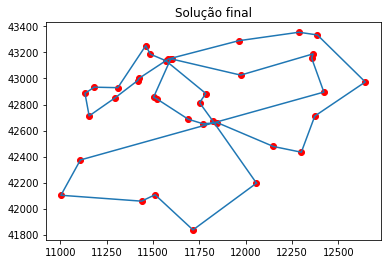

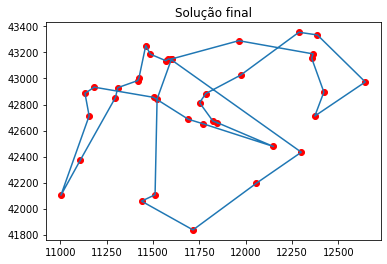

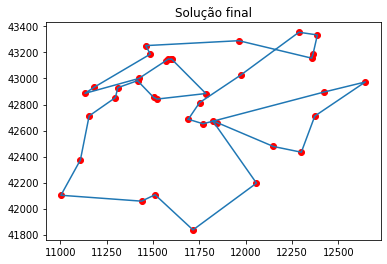

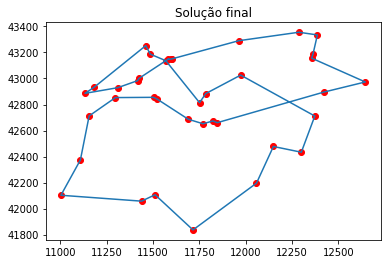

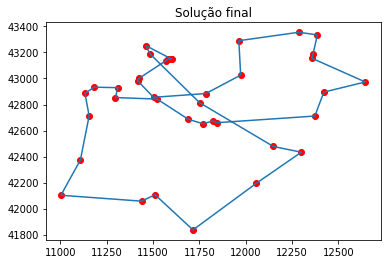

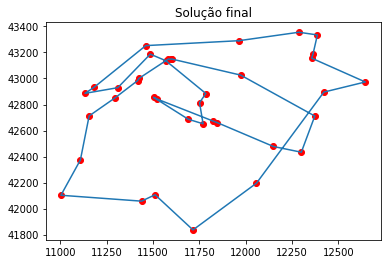

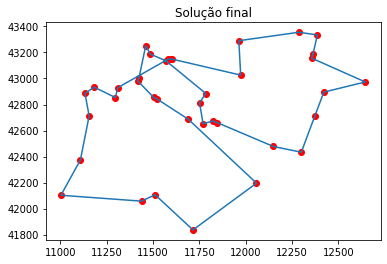

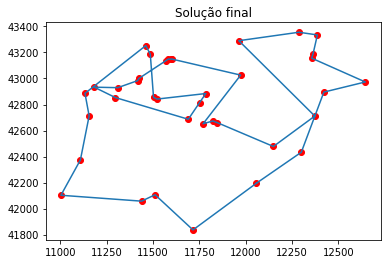

----------- Caixeiro viajante ------------- Local Beam ------------
Melhore resultado de todas as execuções:  7779.779
Resultado medio:  8918.780
-------------------------------------------------------------------


Fitness Inicial:  30
Fitness Inicial:  26
Fitness Inicial:  30
Fitness Inicial:  28
Fitness Inicial:  40
Fitness Inicial:  40
Fitness Inicial:  28
Fitness Inicial:  25
---------------- N rainhas ---------- Tabu Search -----------------
Melhore resultado de todas as execuções:  0
Resultado medio:  0.625
-------------------------------------------------------------------


Fitness Inicial:  30
Fitness Inicial:  31
Fitness Inicial:  31
Fitness Inicial:  32
Fitness Inicial:  34
Fitness Inicial:  24
Fitness Inicial:  29
Fitness Inicial:  38
---------- N rainhas ---------- Iterated Local Search -------------
Melhore resultado de todas as execuções:  4.000
Resultado medio:  4.375
-------------------------------------------------------------------




In [ ]:
# Testes dos algoritimos:

NUMERO_DE_EXECUCOES = 8

# --- Hill Climbing ---
best = 100000000
media = 0.0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_hill_climbing()
  media += aux
  if aux < best:
    best = aux

print('---------- Caixeiro viajante ------- Hill Climbing ----------------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')


# --- Simulated Annealing ---
best = 100000000
media = 0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_simulated_annealing()
  media += aux
  if aux < best:
    best = aux

print('---------- Caixeiro viajante ------- Simulated Annealing ----------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')


# --- Local Beam ---
best = 100000000
media = 0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_local_beam()
  media += aux
  if aux < best:
    best = aux

print('----------- Caixeiro viajante ------------- Local Beam ------------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')




# --- Tabu Search ---
best = 100000000
media = 0.0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_tabu_search()
  media += aux
  if aux < best:
    best = aux

print('---------------- N rainhas ---------- Tabu Search -----------------')
print('Melhore resultado de todas as execuções: ', best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')


# --- Iterated Local Search ---
best = 100000000
media = 0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_iterated_local_search()
  media += aux
  if aux < best:
    best = aux

print('---------- N rainhas ---------- Iterated Local Search -------------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')